In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import Ridge

%matplotlib inline

In [29]:
df = pd.read_csv('clean_data.csv', index_col=0)

In [31]:
df.head()

,baths,beds,hop_score,monthly_rent,sq_ft,Elevator,No Fee,Cats Allowed,Hardwood Floors,Dishwasher,...,Brownstone,Business Center,Laundry in Unit,Microwave,Loft,Garden/patio,closest_subway_distance,Downtown,Midtown,Uptown
4,1.0,0,84.1,2995,600.0,1,0,1,0,0,...,0,0,0,0,0,0,0.15,1,0,0
7,1.0,2,98.4,2900,700.0,0,0,1,1,1,...,0,0,0,0,0,0,0.19,0,1,0
8,1.0,2,90.4,3695,600.0,1,1,0,0,0,...,0,0,0,0,0,0,0.38,1,0,0
13,1.0,1,84.4,2600,663.0,1,1,1,0,0,...,0,0,0,0,0,0,0.26,0,0,1
15,2.0,3,88.6,6450,1200.0,0,0,1,1,0,...,0,0,1,0,0,0,0.22,0,0,1


In [32]:
#create df of numerical features
df_numericals = df.filter(['monthly_rent','sq_ft','beds', 'baths', 'hop_score', 'closest_subway_distance'], axis=1)

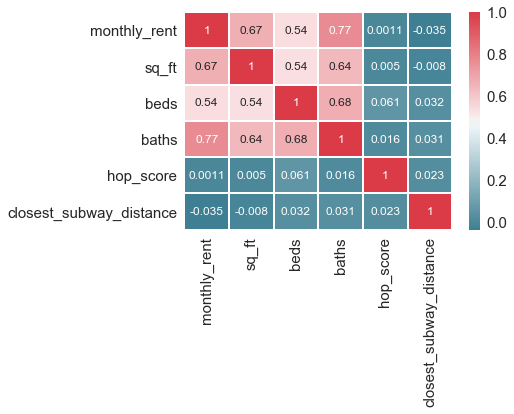

In [112]:
#look at correlations of numerical features
corr = df_numericals.corr()
sns.heatmap(corr, linewidths=1.0 , 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            annot=True, 
            annot_kws={"size": 12}
           )

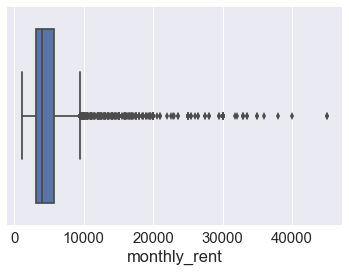

In [97]:
#take a look at box plot of monthly_rent
#mostly within 3000-5000 range, but outliers in the tail end that go past 40000

sns.set_style('whitegrid')
sns.set(font_scale=1.5)
ax = sns.boxplot(x=df['monthly_rent'])

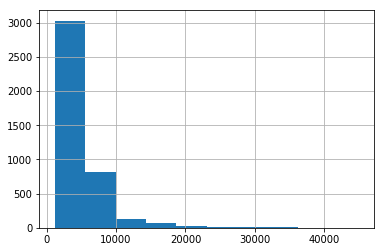

In [34]:
#look at histogram of monthly_rent
df.monthly_rent.hist();

In [35]:
#looks skewed, so take log of monthly rent to get more normal distribution 
df['log_rent'] = np.log(df.monthly_rent)

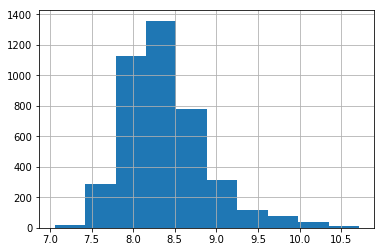

In [36]:
#histogram of log_rent looks more normal
df.log_rent.hist();

In [37]:
X = df.drop(['log_rent', 'monthly_rent'], 1)
y = df['monthly_rent']
y_log = df['log_rent']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.3)

In [66]:
#fit data to linear regression model

model_1 = LinearRegression()
model_1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
model_1.score(X_train,y_train)

0.80593263501590184

In [68]:
#the R score of test is lower than R score of train - the model is probably overfitting
model_1.score(X_test,y_test)

0.58832808454303365

In [47]:
#try regularization to address overfitting
#first normalize the features
from sklearn import preprocessing

# normalize features to values between 0 and 1
df_trans=preprocessing.normalize(df,axis=0)

# turn back in DF
df_trans=pd.DataFrame(df_trans,columns=df.columns)

y_trans=df_trans['log_rent']
X_trans=df_trans.drop(['log_rent', 'monthly_rent'],1)

X_trans.describe()

,baths,beds,hop_score,sq_ft,Elevator,No Fee,Cats Allowed,Hardwood Floors,Dishwasher,Dogs Allowed,...,Brownstone,Business Center,Laundry in Unit,Microwave,Loft,Garden/patio,closest_subway_distance,Downtown,Midtown,Uptown
count,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,...,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000
mean,0.014032,0.012822,0.015545,0.012569,0.014155,0.011899,0.012677,0.010190,0.011465,0.012369,...,0.001395,0.003611,0.005007,0.002582,0.003586,0.002737,0.013127,0.008622,0.007238,0.009291
std,0.006782,0.008861,0.001112,0.009216,0.006523,0.010066,0.009067,0.011794,0.010558,0.009483,...,0.015524,0.015163,0.014761,0.015372,0.015169,0.015345,0.008402,0.012985,0.013804,0.012515
min,0.009526,0.000000,0.014317,0.000013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000670,0.000000,0.000000,0.000000
25%,0.009526,0.007653,0.014808,0.008203,0.017160,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006696,0.000000,0.000000,0.000000
50%,0.009526,0.015305,0.015156,0.010710,0.017160,0.020412,0.019160,0.000000,0.021186,0.019638,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011384,0.000000,0.000000,0.000000
75%,0.019052,0.015305,0.015995,0.014906,0.017160,0.020412,0.019160,0.023837,0.021186,0.019638,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018080,0.028172,0.000000,0.026144
max,0.061920,0.045915,0.020453,0.377996,0.017160,0.020412,0.019160,0.023837,0.021186,0.019638,...,0.174078,0.067267,0.048507,0.094072,0.067729,0.088736,0.050223,0.028172,0.033558,0.026144


In [91]:
#this is the normalization factor used to transform df
df.log_rent.iloc[0]/df_trans.log_rent.iloc[0]

539.31994139799565

In [187]:
#try to find the best alpha for L2 Ridge model

from sklearn.linear_model import Ridge
kf = KFold(len(X_trans),n_folds=10, shuffle=True)

all_scores=[]
alphas=[1e-5,1e-3,1e-1,1,100]
all_r2_train = []
all_r2_test = []

for train, test in kf:
    x_train=X_trans.iloc[train]
    y_train=y_trans.iloc[train]
    x_test=X_trans.iloc[test]
    y_test=y_trans.iloc[test]
    mse_score=[]
    r2_train=[]
    r2_test = []
    for a in alphas:
        est=Ridge(alpha=a,tol=0.001)
        est.fit(x_train,y_train)
        mse=np.mean((y_test-est.predict(x_test))**2)
        mse_score.append(mse)
        r2_train.append(est.score(x_train, y_train))
        r2_test.append(est.score(x_test, y_test))
            
    all_scores.append(mse_score)
    all_r2_train.append(r2_train)
    all_r2_test.append(r2_test)
avg_r2_test = np.mean(all_r2_test, axis=0)
avg_r2_test

array([ 0.71922496,  0.71993248,  0.72286815,  0.46753309,  0.00856404])

In [188]:
avg_r2_train = np.mean(all_r2_train, axis=0)
avg_r2_train

array([ 0.77464501,  0.77461915,  0.74424121,  0.47398042,  0.0115641 ])

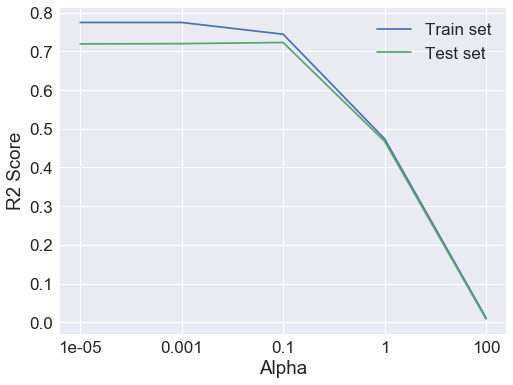

In [218]:
plt.figure(figsize=(8,6))
plt.plot(avg_r2_train, label = 'Train set')
plt.plot(avg_r2_test, label = 'Test set')
x = [0 , 1, 2, 3, 4]
labels = alphas
plt.xticks(x, labels)
plt.legend()
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show();

No handles with labels found to put in legend.


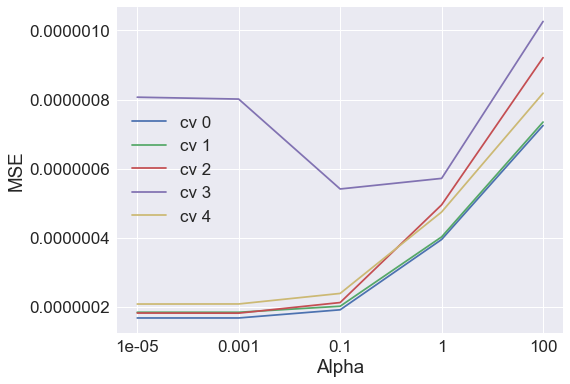

In [189]:
#choose alpha of 0.1 to minimize MSE and 
#to minimize varaince between R2 scores of train and test sets

plt.figure(figsize=(8,6))
plt.legend()
for i in range(5):
    plt.plot(all_scores[i],label = 'cv %s'%i)
x = [0 , 1, 2, 3, 4]
labels = alphas
plt.xticks(x, labels)
plt.legend()
plt.ylabel('MSE')
plt.xlabel('Alpha')
plt.show();

In [88]:
#the best alpha is 0.1
#The average R_2 score for 10-fold cv Ridge, alpha = 0.1 for train set is 0.744
#The average R_2 score for 10-fold cv teRidge, alpha = 0.1 for test set is 0.721

In [190]:
est=Ridge(alpha=0.1,tol=0.01)

In [191]:
est.fit(x_train,y_train)
est.score(x_train, y_train)

0.738795268613891

In [192]:
est.score(x_test, y_test)

0.77585350931863828

In [193]:
#the top 5 features that positively contribute to monthly rent
zipped=zip(X.columns,est.coef_)
features=sorted(zipped,key = lambda t: t[1],reverse=True)
features[:5]

[('baths', 0.036475440138802863),
 ('beds', 0.028297493826838827),
 ('sq_ft', 0.022848330226127152),
 ('Doorman', 0.010209890708982343),
 ('Laundry In Unit', 0.0066294923676450306)]

In [194]:
#the top 5 features that negatively contribute to monthly rent
features[-5:]

[('closest_subway_distance', -0.0032169930766742295),
 ('Midtown', -0.0038949660923753211),
 ('No Fee', -0.0055225816554529648),
 ('Uptown', -0.0055742599739494365),
 ('Laundry In Building', -0.0058016814244407746)]

In [197]:
pred = est.predict(x_test)

Text(0,0.5,'Residuals')

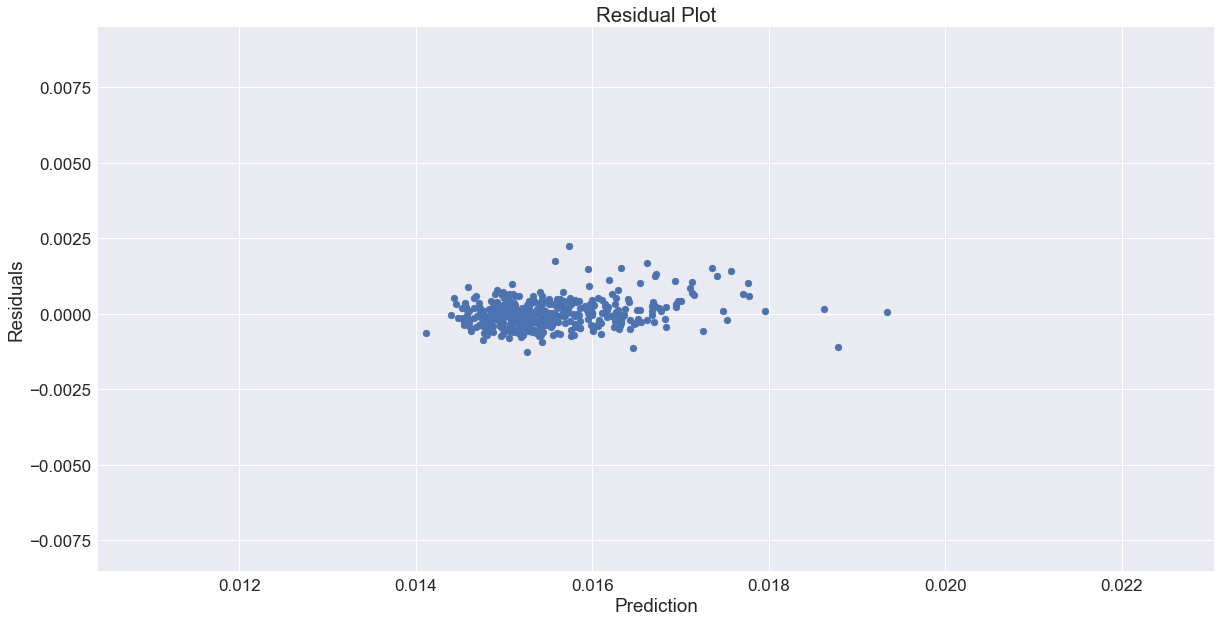

In [198]:
#residual plot

res = y_test - pred
plt.figure(figsize=(20,10))
plt.scatter(pred, res)
plt.title('Residual Plot')
plt.xlabel('Prediction')
plt.ylabel('Residuals')

In [199]:
ddf = pd.DataFrame({'y_test': y_test, 'pred_y': pred})
ddf['predicted_rent'] = ddf['pred_y'].map(lambda y: np.e**(y * 539.31994139799565))
ddf['actual_rent'] = ddf['y_test'].map(lambda y: np.e**(y * 539.31994139799565))
ddf['residual'] = ddf['actual_rent'] - ddf['predicted_rent']

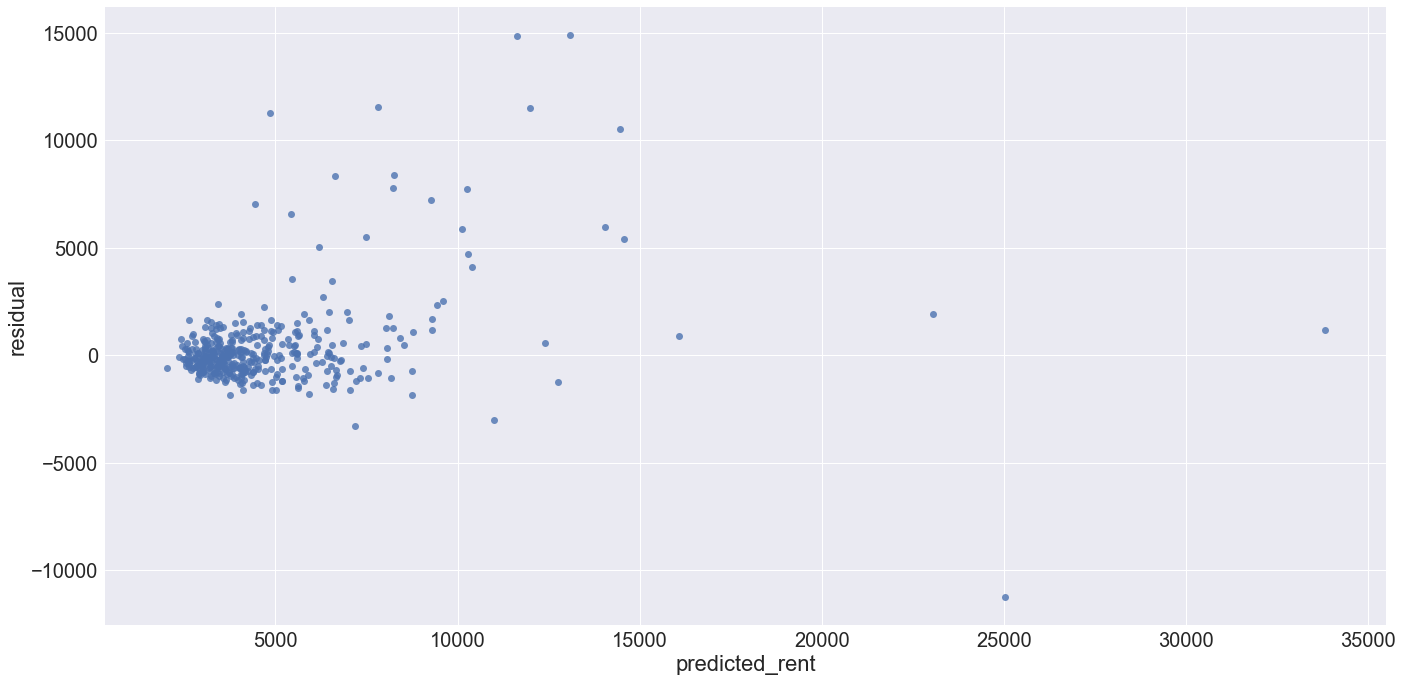

In [200]:
#residual plot converting log_rent back to monthly_rent

sns.set(rc={'figure.figsize':(20,10)})
sns.set(font_scale=2.0)
sns.lmplot(x='predicted_rent', y='residual', data=ddf, fit_reg=False, size=10, aspect=2)

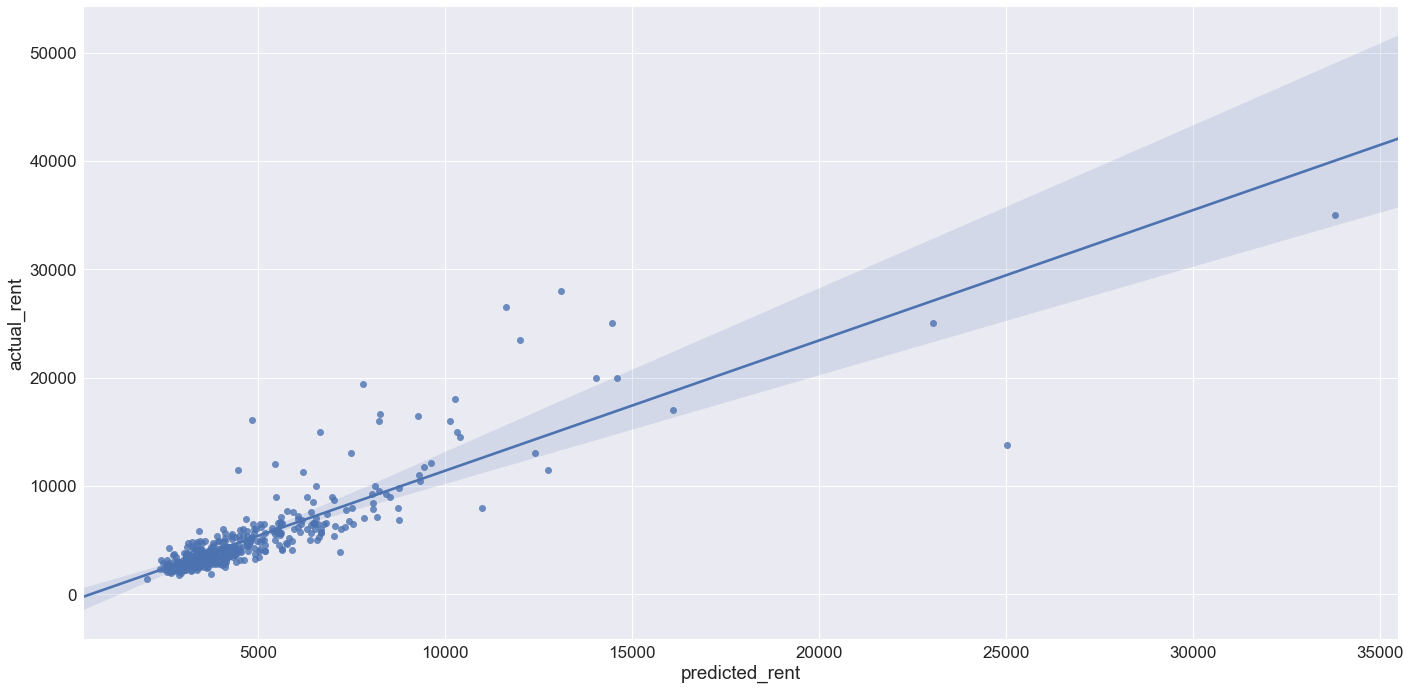

In [201]:
#regression fit

sns.set(rc={'figure.figsize':(20,10)})
sns.set(font_scale=1.7)
sns.lmplot(x='predicted_rent', y='actual_rent', data=ddf, size=10, aspect=2)